# The Monty Hall problem

The task is to simulate multiple times the Monty Hall problem. There are three doors: one contains a Lamborghini and the other two just goats. The presenter opens one of them and there's a goat; he then asks  if the players wants to switch. There are three contestants behaving in three different ways:

+ A) chooses to keep it; 
+ B) chooses to switch ; 
+ C) enters and doesn't know of the previous moves: he chooses one door randomically between the remaining two;

Simulate the problem multiple times and see which person has the biggest winning probability.

In [1]:
import numpy as np

In [2]:
n_doors = int(input("How many doors?"))

How many doors?3


In [3]:
# first set the objects to put behind the doors (1 Lamborghini, the rest are goats)

list_of_obj = ["Lamborghini"]

for i in range(0, n_doors - 1): 
    
    list_of_obj.append("goat")

In [4]:
# define functions to make choice

def choices_A_B(doors, choice_index): 
    
    index = []
    
    if doors[choice_index] != "Lamborghini":  
    
        return choice_index, np.where(doors == "Lamborghini")[0][0]  # returns A and B choices, respectively
                
    if doors[choice_index] == "Lamborghini": 
        
        for i in range(0, len(doors)): 
        
            if i != choice_index: 
            
                index.append(i)
        
        hidden_goat = np.random.randint(0, len(doors) - 1)  # randomically chooses one goat-door to open 
            
        return choice_index, index[hidden_goat]  # returns A and B choices, respectively

In [5]:
def choices_C(index_1, index_2): 
    
    random_choice = np.random.randint(0, 2)  # player C chooses randomically between the two remaining doors 
    
    if random_choice == 0: 
        
        return index_1  # first door choice
    
    return index_2  # second door choice

In [6]:
def won_lost(A, B, C): 
    
    players = ["A", "B", "C"]
    wins = {}
    
    # initial state
    
    wins["A"] = "lost"
    wins["B"] = "lost"
    wins["C"] = "lost"
    
    # change the value of the state "wins" only if one of them has "Lamborghini" as prize
    
    if A == "Lamborghini": 
        
        wins["A"] = "won"
        
    if B == "Lamborghini": 
        
        wins["B"] = "won"
        
    if C == "Lamborghini": 
        
        wins["C"] = "won"
        
    return wins

In [7]:
def how_many_wins(results_array):  # returns the counts of winnings from states "won"/"lost"
    
    counts = {"A": 0, "B": 0, "C": 0}
    
    for i in results_array: 
        
        if results_array[i]["A"] == "won": 
            
            counts["A"] = counts["A"] + 1
            
        if results_array[i]["B"] == "won": 
            
            counts["B"] = counts["B"] + 1
            
        if results_array[i]["C"] == "won": 
            
            counts["C"] = counts["C"] + 1
            
    return counts

## Simulate the results:

In [8]:
n_simul = int(input("How many times do I simulate?"))  # doing some stats on results

How many times do I simulate?1000


In [9]:
results_array = {}
doors = {}

for i in range(0, n_simul):
    
    # set the objects randomically behind doors and choose one randomically:
    
    doors[f"setting_{i}"] = np.random.choice(list_of_obj, size=n_doors, replace=False)
    initial_choice = np.random.randint(0, n_doors)
    
    # set the choices of A, B and C:
    
    choice_A, choice_B = choices_A_B(doors[f"setting_{i}"], initial_choice)
    choice_C = choices_C(choice_A, choice_B)
    
    # evaluate their prize:
    
    choice_prize_A = doors[f"setting_{i}"][choice_A]
    choice_prize_B = doors[f"setting_{i}"][choice_B]
    choice_prize_C = doors[f"setting_{i}"][choice_C]
    
    
    results_array[f"{i}_attempt"] = won_lost(choice_prize_A, choice_prize_B, choice_prize_C)  

Now I define a vector to store the outcomes in terms of wins and losses: 

In [10]:
total_wins = how_many_wins(results_array)

Then I evaluate the total probability of the players: 

In [11]:
probability = {"A": total_wins["A"] / n_simul, "B": total_wins["B"] / n_simul, "C": total_wins["C"] / n_simul}

In [12]:
print(probability)

{'A': 0.328, 'B': 0.672, 'C': 0.475}


I'd definitely choose to be player B. If one chooses to have 100 doors instead of just 3, this is even more evident (to do so, one can change the n_doors in imput at line [$\texttt{2}]$).

## P(N)

In [13]:
probab_N = {}
results_array = {}
doors = {}

for n_doors in [3, 15, 35, 55, 100]:
    
    list_of_obj = ["Lamborghini"]

    for i in range(0, n_doors - 1): 
    
        list_of_obj.append("goat")
    
    for i in range(10, 1000):  # set only 100 simul otherwise comput issues
    
        # set the objects randomically behind doors and choose one randomically:
        
        doors[f"setting_{i}"] = np.random.choice(list_of_obj, size=n_doors, replace=False)
        initial_choice = np.random.randint(0, n_doors)
        
        # set the choices of A, B and C:
        
        choice_A, choice_B = choices_A_B(doors[f"setting_{i}"], initial_choice)
        choice_C = choices_C(choice_A, choice_B)
        
        # evaluate their prize:
        
        choice_prize_A = doors[f"setting_{i}"][choice_A]
        choice_prize_B = doors[f"setting_{i}"][choice_B]
        choice_prize_C = doors[f"setting_{i}"][choice_C]
        
        
        results_array[f"{i}_attempt"] = won_lost(choice_prize_A, choice_prize_B, choice_prize_C) 
    
    total_wins = how_many_wins(results_array)
    
    probab_N[f"{n_doors}"] = [total_wins["A"] / 1000, total_wins["B"] / 1000, total_wins["C"] / 1000]

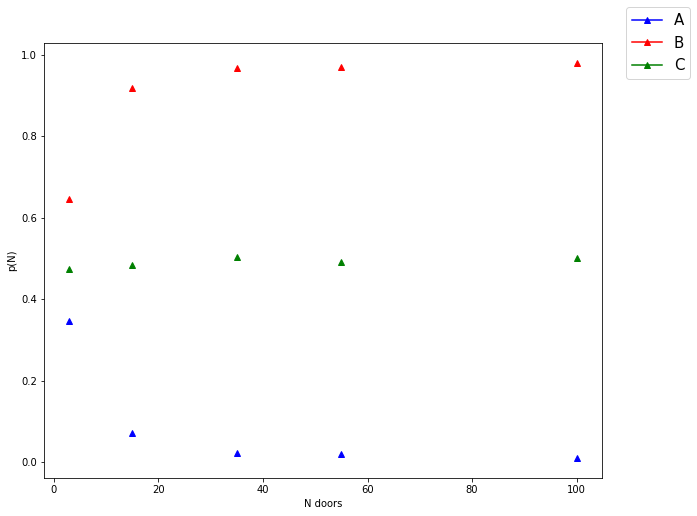

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for n_doors in [3, 15, 35, 55, 100]: 

    handleA = plt.plot(n_doors, probab_N[f"{n_doors}"][0], color='blue', marker='^', label='A')
    handleB = plt.plot(n_doors, probab_N[f"{n_doors}"][1], color='red',  marker='^', label='B')
    handleC = plt.plot(n_doors, probab_N[f"{n_doors}"][2], color='green',  marker='^', label='C')
    
plt.xlabel('N doors')
plt.ylabel('p(N)')
plt.legend(handles=[handleA[0], handleB[0], handleC[0]], fontsize=15, bbox_to_anchor=(1.1, 1.), loc='center');

From this plot it should be even clearer than choosing like the "B" person is always best. 